In [2]:
import pandas as pd

# Read the results of DEG
deg_df = pd.read_csv(r"D:\project data\M-28\NTU_DATA_CLEANED\PAAD_DEG_Significant_Results.csv")

# Extract down-regulated genes (log2FC < -1 and significant FDR)
down_genes = deg_df[(deg_df["Log2_Fold_Change"] < -1) & (deg_df["Adj_P_Value"] < 0.05)]["HGNC_Symbol"].dropna().tolist()

print(f"Totally identified {len(down_genes)} down-regulated genes")


Totally identified 84 down-regulated genes


The down-regulation of genes is too less.

Let's draw a distribution map to have a loo.



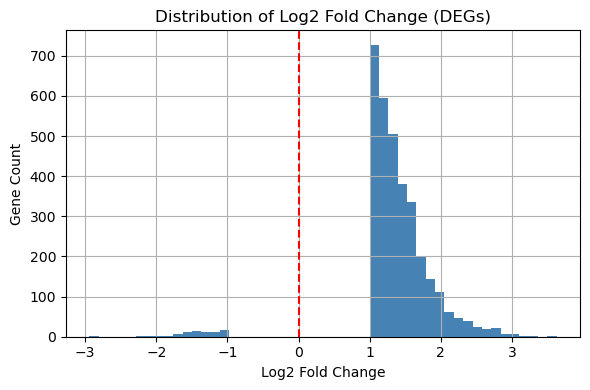

In [20]:
import matplotlib.pyplot as plt

# View the distribution histogram of log2FC
plt.figure(figsize=(6, 4))
deg_df["Log2_Fold_Change"].hist(bins=50, color="steelblue")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Log2 Fold Change (DEGs)")
plt.xlabel("Log2 Fold Change")
plt.ylabel("Gene Count")
plt.tight_layout()
plt.show()


It was mainly the up-regulation of genes, and the down-regulation was too little. 
<br>


In [6]:
import gseapy as gp

# Use the gseapy.enrichr method
enr = gp.enrichr(
    gene_list=down_genes,
    gene_sets=["GO_Biological_Process_2021", "KEGG_2021_Human"],
    organism="Human",
    outdir="downregulated_enrichr_results",  # output directory
    cutoff=0.1
)

# Print the top 10 result
print("\nTop downregulated pathways:")
print(enr.results.head(10))


ValueError: Warning: No enrich terms when cutoff = 0.1

Even we changed the parameters Log2_Fold_Change and Adj_P_Value, the filtering range remains the same

At present, there are two options:<br>
1. Try using the all results table (no need for significant results).<br>
2. Directly change to GSEA instead of GO\KEGG

First try to use DEG all results.d1

In [14]:
import pandas as pd

# Read the results of DEG
deg_df = pd.read_csv(r"D:\project data\M-28\NTU_DATA_CLEANED\PAAD_DEG_All_Results.csv")

# Extract down-regulated genes (log2FC < -1 and significant FDR)
down_genes = deg_df[(deg_df["Log2_Fold_Change"] < -1) & (deg_df["Adj_P_Value"] < 0.05)]["HGNC_Symbol"].dropna().tolist()

print(f"Totally identified{len(down_genes)} down-regulated genes")

Totally identified84 down-regulated genes


The down-regulation of the gene remains unchanged, then we'll directly modify **GSEA**
The Lead Genes with significant "down-regulation pathways" in the GSEA analysis were used to represent the down-regulation modules, followed by Enrichr enrichment analysis分析The advantage of doing this is:
1. It does not depend on whether there are down-regulated genes in DEG: because GSEA is a whole gene sequencing analysis <br>2. It✅ can represent pathways to regulate "core Genes that are actually inhibited" : these Lead Genes are key to negative NES <br>3.
The r scenario (MIR100HG high expression group pathway down-regulation) : perfectly aligns witr research objectiv的研究目标


In [17]:
# ✅ 提取 GSEA 中 NES < 0 的下调通路
down_pathways = gsea_res.res2d[gsea_res.res2d["NES"] < 0]

# ✅ 收集所有 Lead Genes
lead_genes_all = []
for genes in down_pathways["Lead_genes"]:
    lead_genes_all.extend(genes.split(";"))

# ✅ 去重
lead_genes_unique = list(set(lead_genes_all))
print(f"The number of Lead Genes extracted from the down-regulation pathway：{len(lead_genes_unique)}")

# ✅ 进行 Enrichr 富集分析
import gseapy as gp

enr_lead = gp.enrichr(
    gene_list=lead_genes_unique,
    gene_sets=["GO_Biological_Process_2021", "KEGG_2021_Human"],
    organism="Human",
    outdir="enrichr_from_GSEA_downregulated_leads",
    cutoff=0.2
)

# ✅ 保存结果
# enr_lead.results.to_csv("enrichment_from_GSEA_downregulated_leads.csv", index=False)

# ✅ 可选查看 Top 通路
print(enr_lead.results.head(10))


NameError: name 'gsea_res' is not defined